<a href="https://colab.research.google.com/github/Detonator1503/Final_projects/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End- to- End Heart Disease Prediction 
The dataset is from kaggle :-https://www.kaggle.com/datasets/priyanka841/heart-disease-prediction-uci

Here we need to predict if the person is having Heart Disease on given features 

The column Descriptions are as follows 

1. (age)= age in years
2. (sex)= sex (1 = male; 0 = female)
3. (cp)= chest pain type-- Value 1: typical angina
                           Value 2: atypical angina
                           Value 3: non-anginal pain
                           Value 4: asymptomatic
4. (trestbps)= resting blood pressure (in mm Hg on admission to the hospital)
5. (chol)= serum cholestoral in mg/dl
6. (fbs)= (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. (restecg)= resting electrocardiographic results -- Value 0: normal
                                                      Value 1: havingST-T wave abnormality                                                            (T wave inversions and/or ST elevation                                                               or depression of > 0.05 mV)
                                                      Value 2: showing probable or definite left ventricular
                                                              hypertrophy by Estes' criteria
8. (thalach)= maximum heart rate achieved
9. (exang)= exercise induced angina (1 = yes; 0 = no)
10. (oldpeak)= ST depression induced by exercise relative to rest
11. (slope)= the slope of the peak exercise ST segment-- Value 1: upsloping
                                                              Value 2: flat
                                                              Value 3: downsloping
12. (ca)= number of major vessels (0-3) colored by flourosop
13. (thal)= 3 = normal; 6 = fixed defect; 7 = reversable defect
14. (target) (the predicted attribute)= diagnosis of heart disease (angiographic disease status)
                                    Value 0: < 50% diameter narrowing

                                     Value 1: > 50% diameter narrowing

In [125]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
 


In [126]:

df = pd.read_csv("/content/drive/MyDrive/csvs/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [128]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Exploration

In [129]:
# Looking for unique values 
for i in df.columns:
  print(i, "=", df[i].unique())

age = [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex = [1 0]
cp = [3 2 1 0]
trestbps = [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol = [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs =

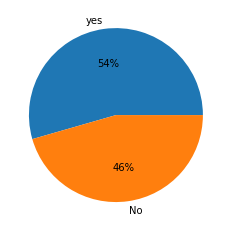

1    165
0    138
Name: target, dtype: int64

In [130]:
# No of targets 
plt.figure()
plt.pie(df["target"].value_counts(), labels = ["yes", "No"], autopct = "%.0f%%")
plt.show();

# in Numbers 
df["target"].value_counts()

There are 303 patients and out of which 165 are having heartattack and the rest 138 arent having heartattack 

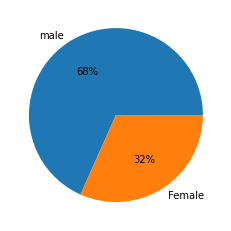

1    207
0     96
Name: sex, dtype: int64

In [131]:
# sex of the patients
plt.figure()
plt.pie(df["sex"].value_counts(), labels = ["male", "Female"], autopct = "%.0f%%")
plt.show();

#  in nos.
df["sex"].value_counts()

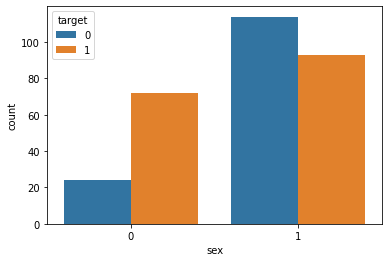

In [132]:
# is there any relation with sex of the patient and having heartdisease
plt.figure()
sns.countplot(df["sex"], hue = df["target"])
plt.show();

Here we can see the if the patient is Female there are high chances of having Heartdiseases according to the data 

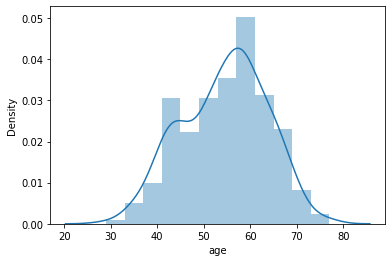

In [133]:
# Density of the age in the dataset 
plt.figure()
sns.distplot(df["age"])
plt.show();

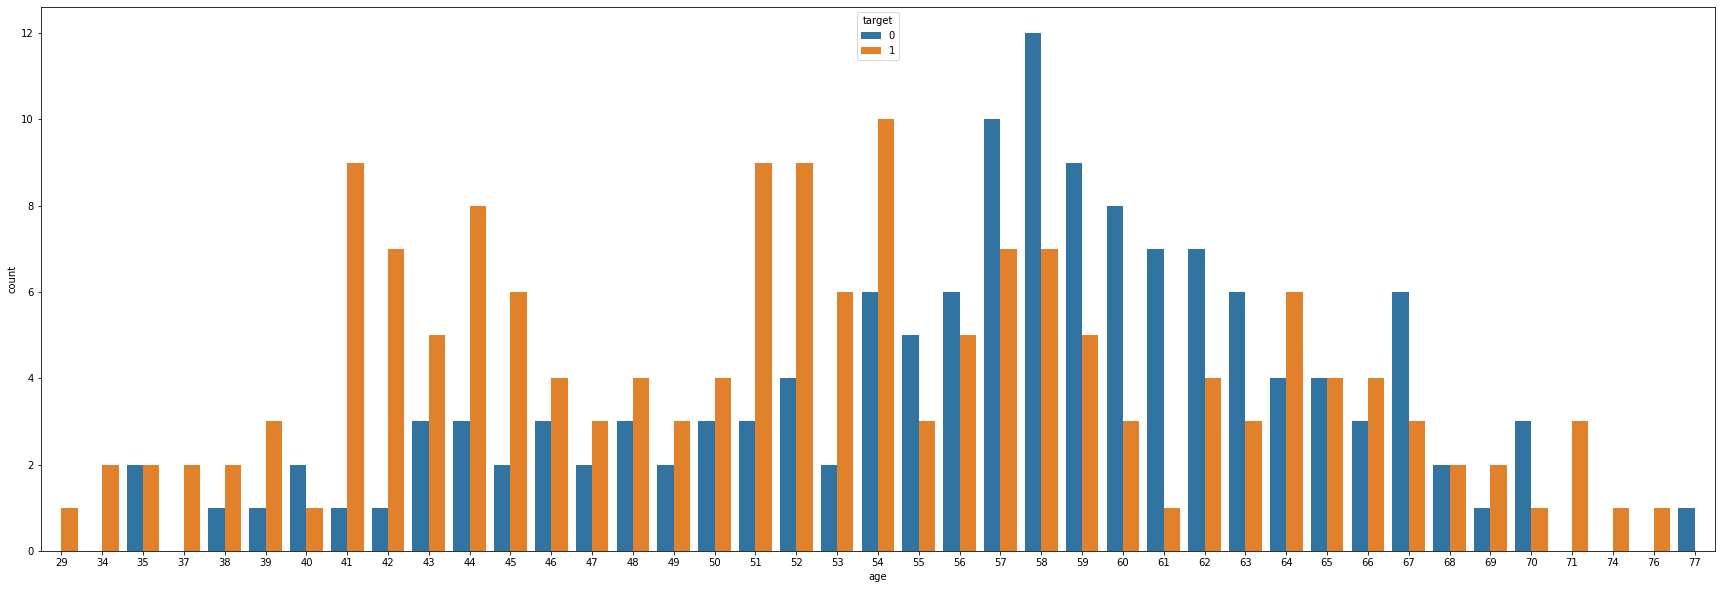

In [134]:
# is there any relation with age and having Heartdisease
plt.figure(figsize = (30, 10))
sns.countplot(df["age"], hue = df["target"])
plt.show();

From above Graphs we have the patients from age group of 29 to 77 yrs where the patients having heartdisease is gradually increasing from yr 41 to 60

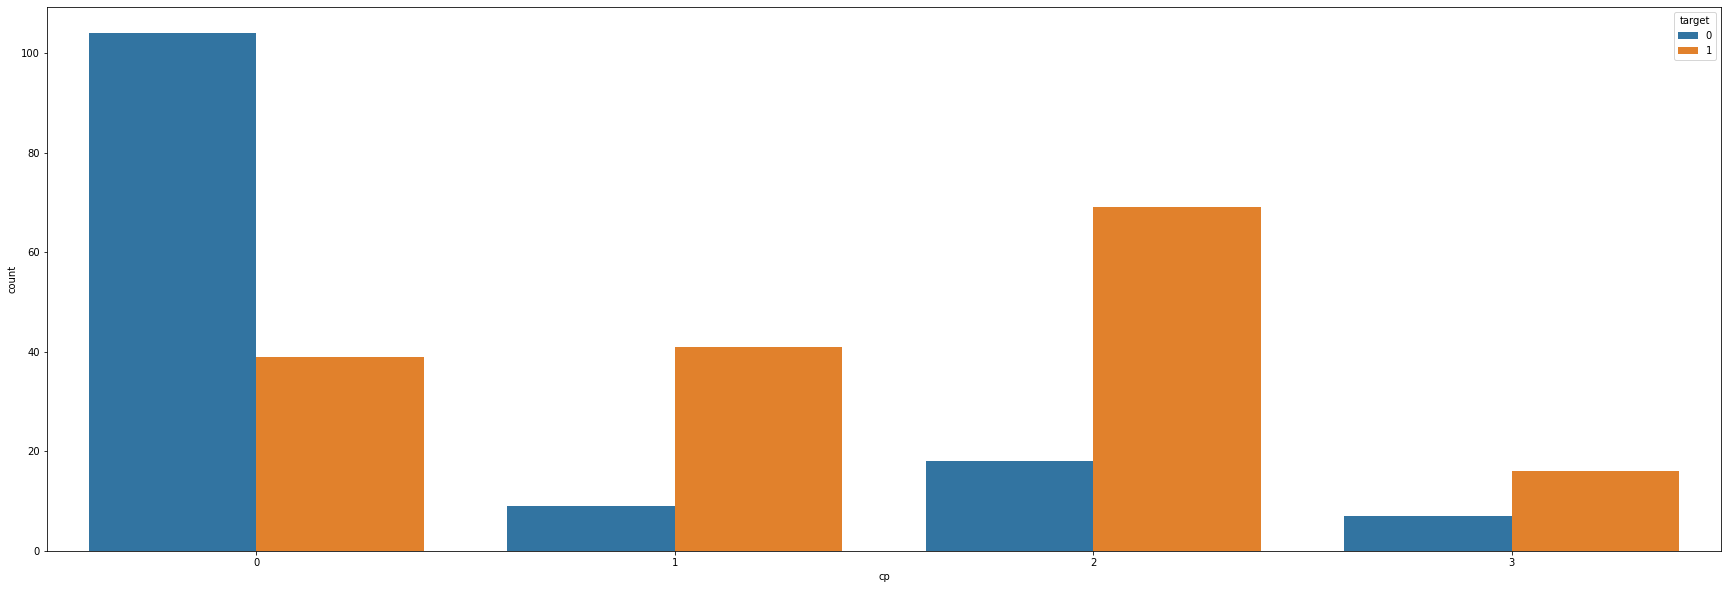

In [135]:
# Relation with the ChestPain and having heartdisease or not
plt.figure(figsize = (30, 10))
sns.countplot(df["cp"], hue = df["target"])
plt.show();

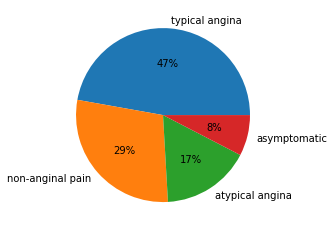

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [136]:
plt.figure()
plt.pie(df["cp"].value_counts(), labels = ['typical angina', 'non-anginal pain', 'atypical angina', 'asymptomatic'], autopct = "%.0f%%")
plt.show();

#  in nos.
df["cp"].value_counts()

typical angina means low blood flow in the heart , from above graphs we can see that if the chest pain is other than typical angina there are high chances of paatient having heartdisease.

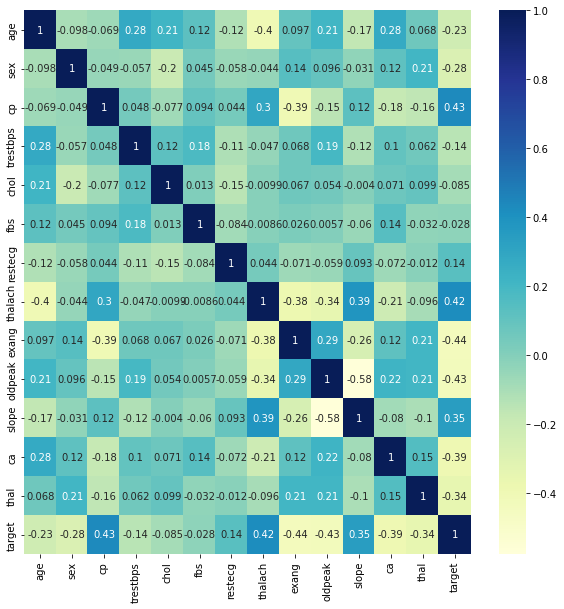

In [137]:
# Looking for the correlation of the columns 
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu")
plt.show()

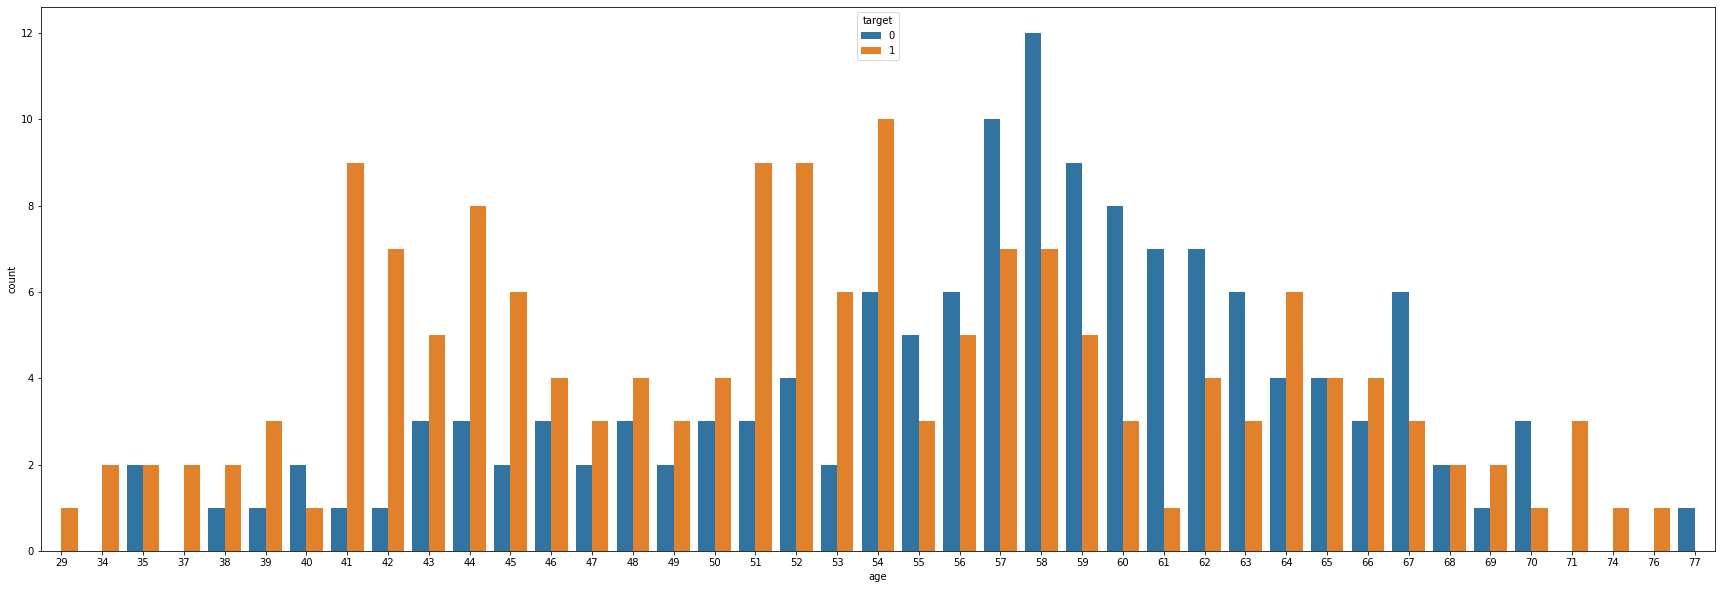

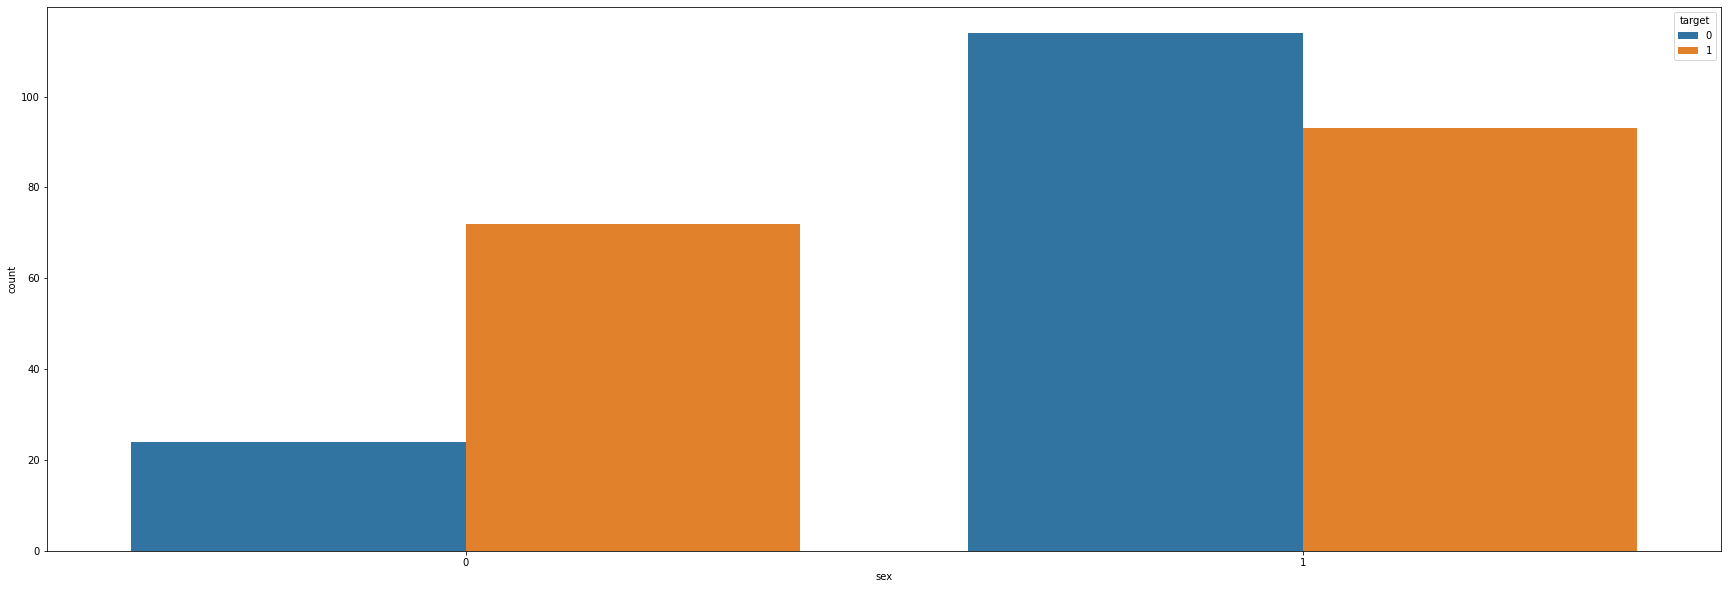

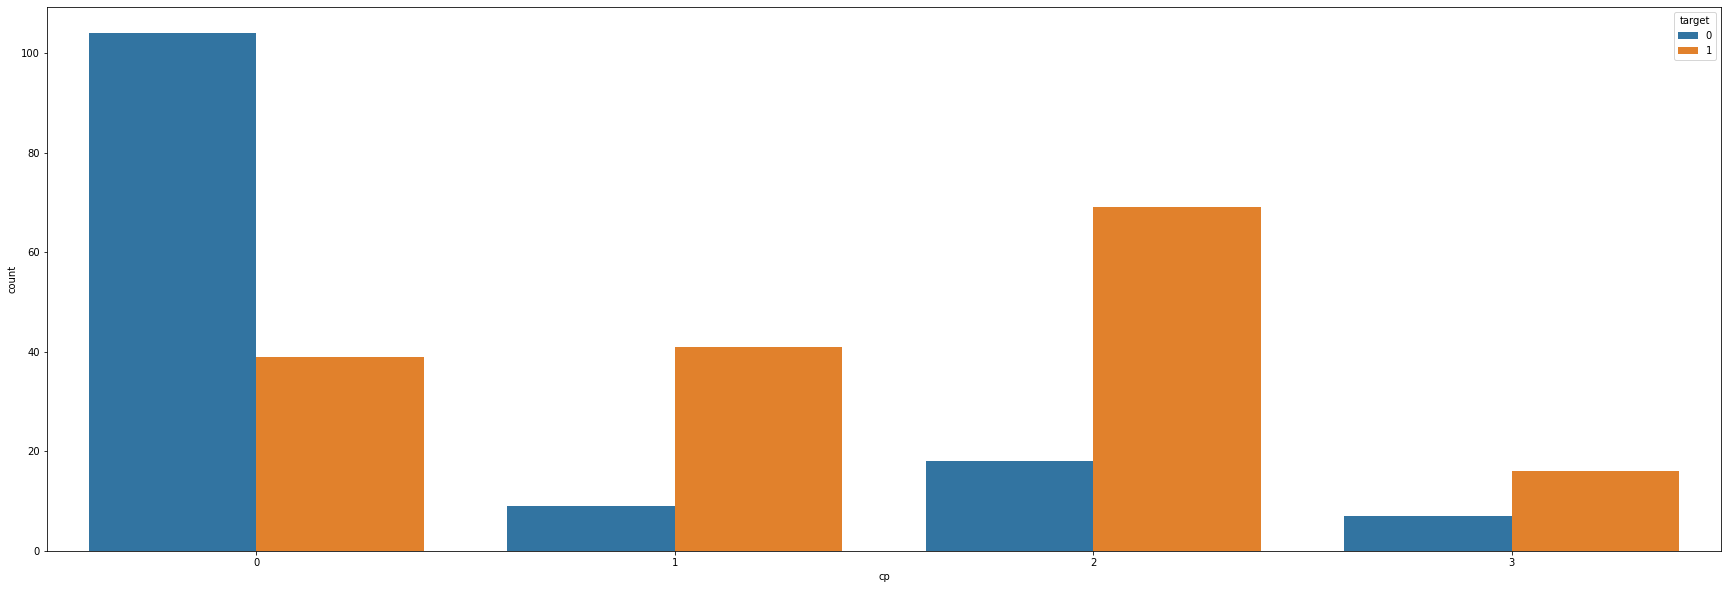

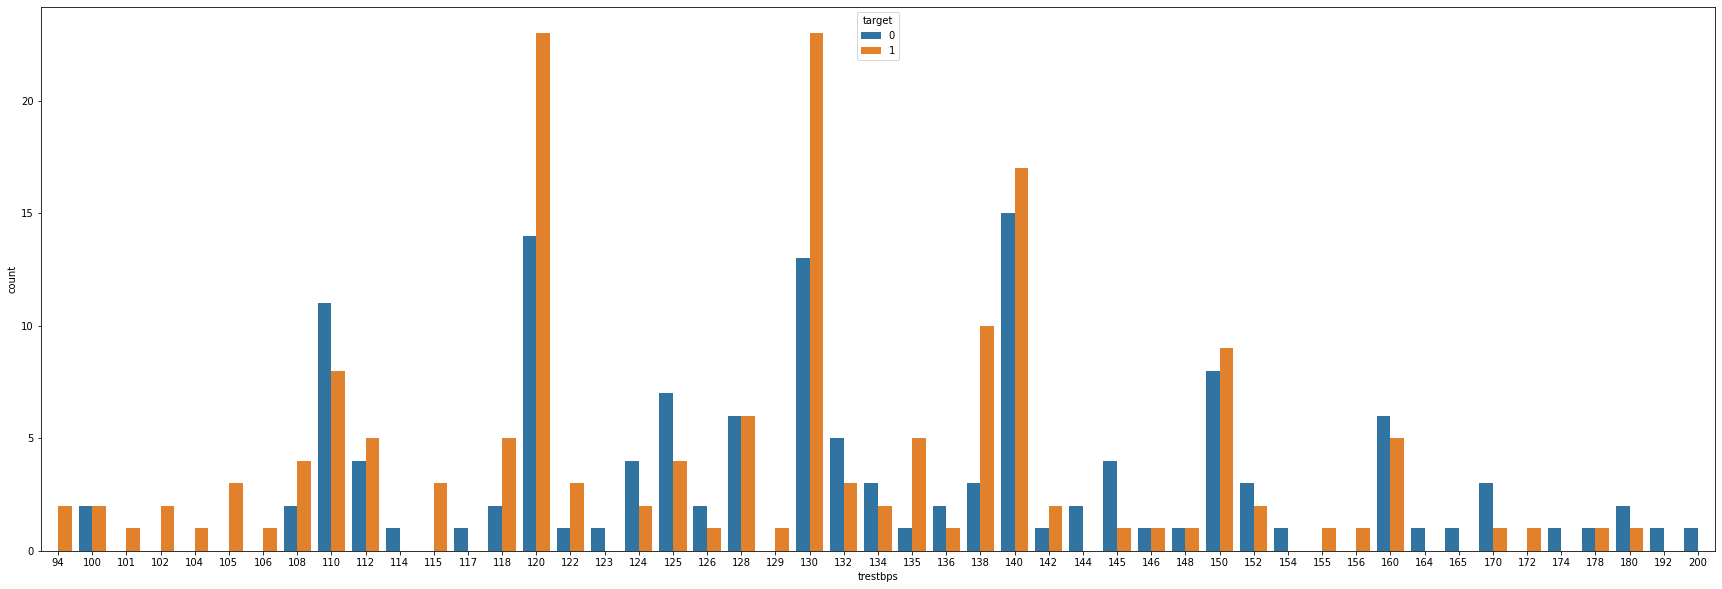

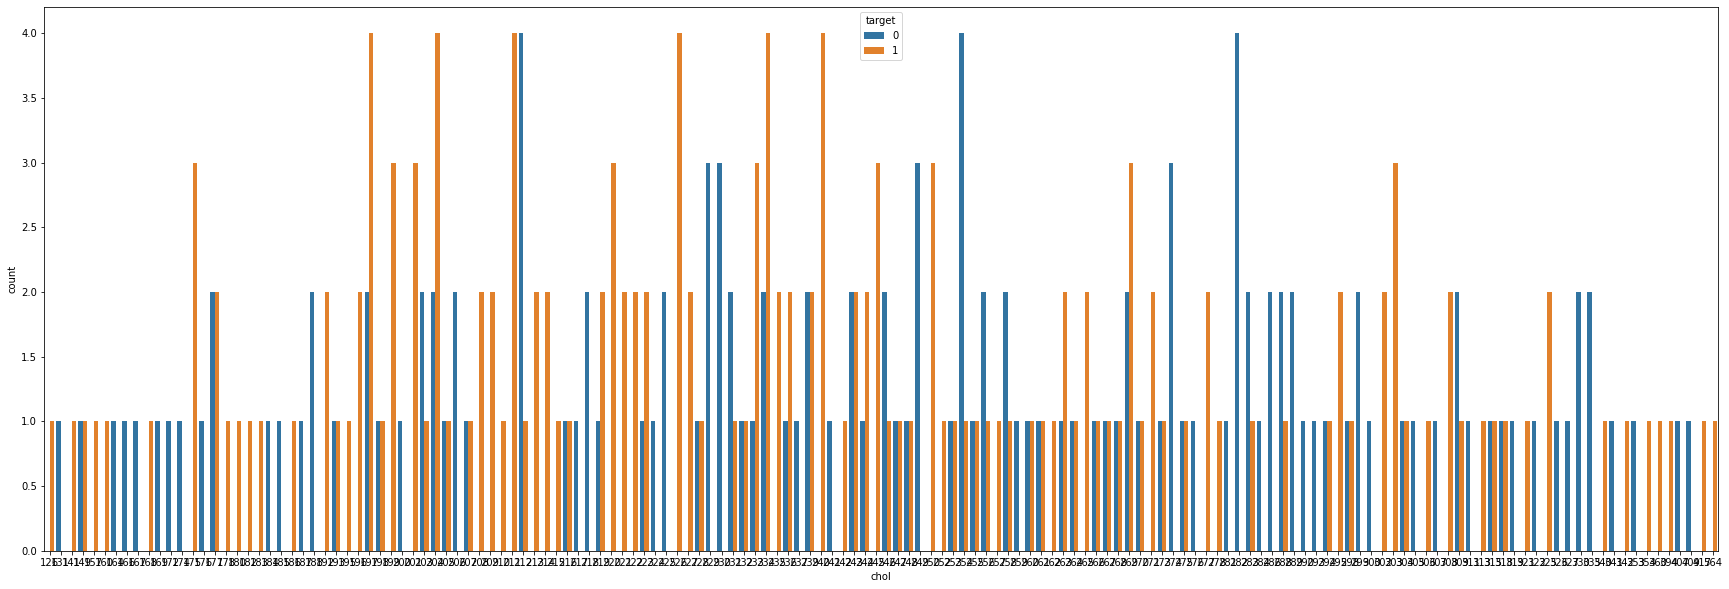

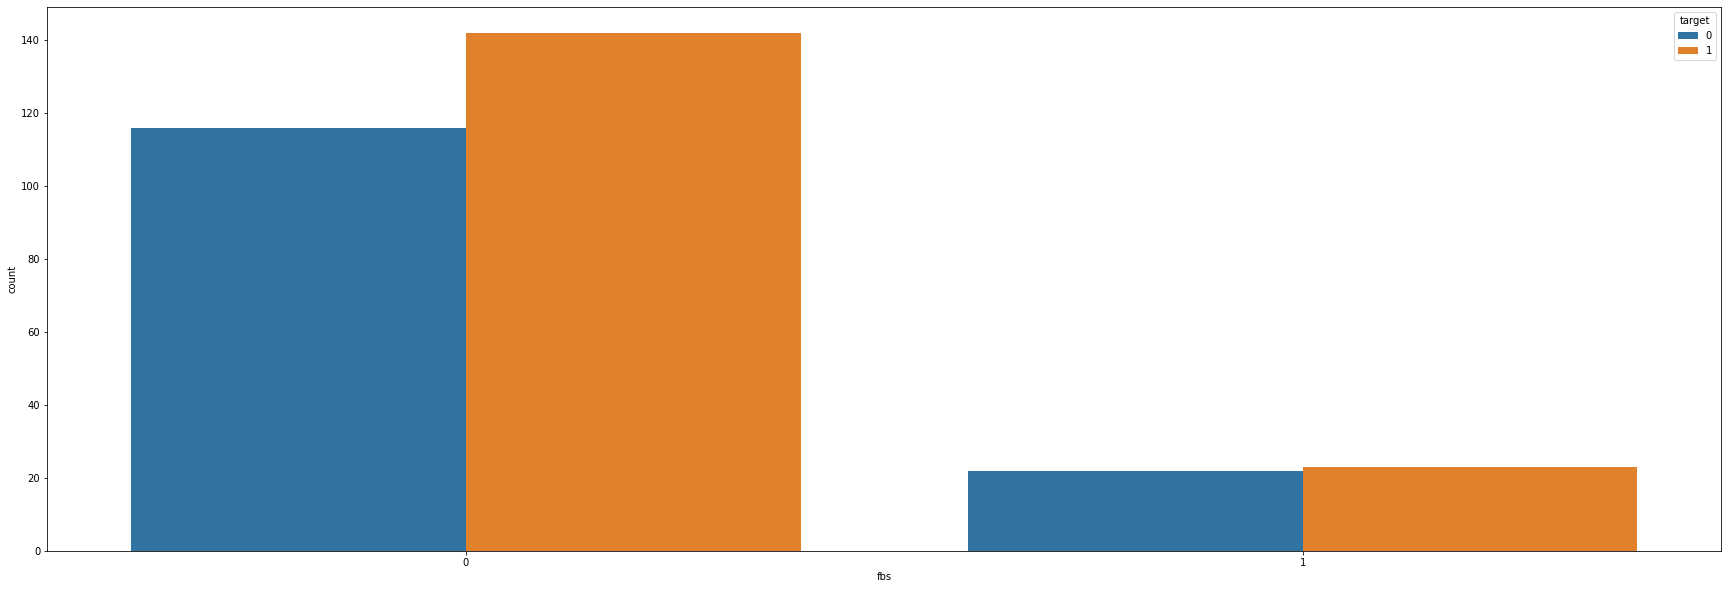

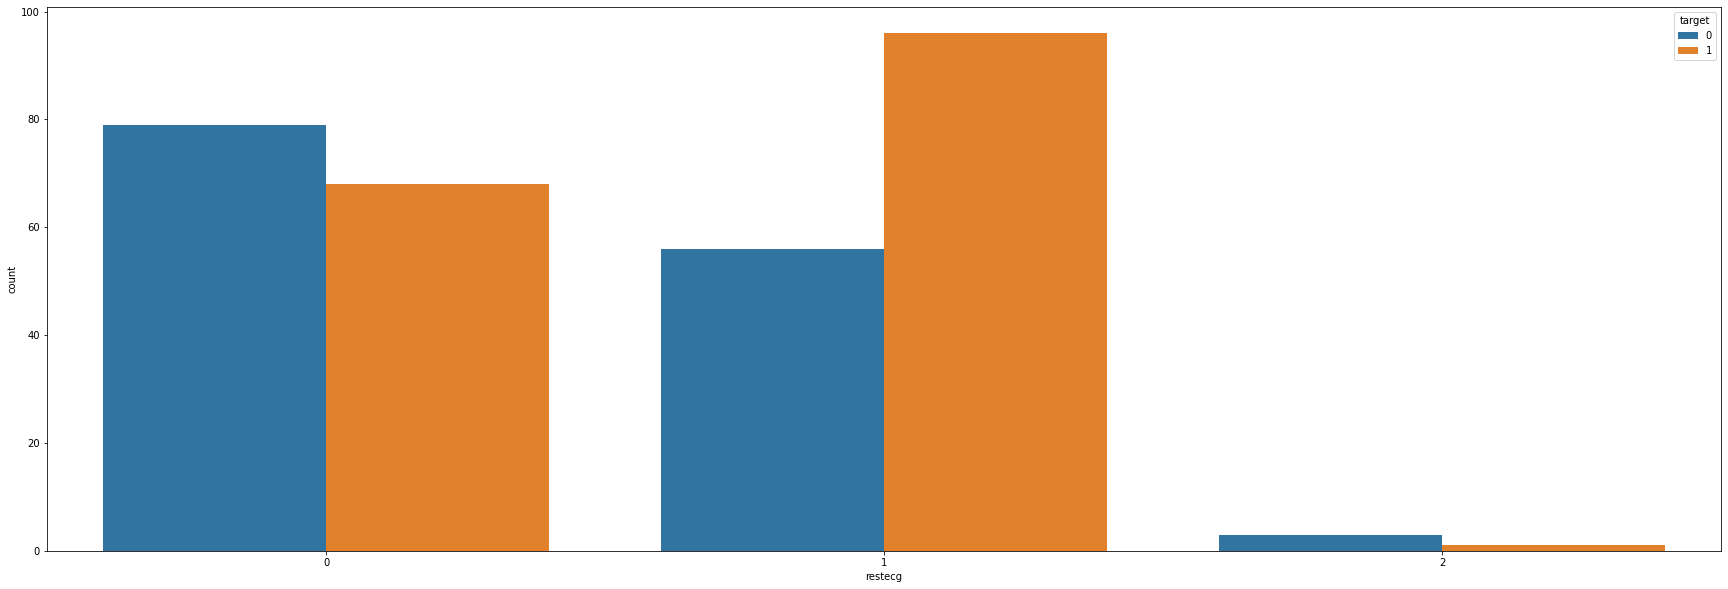

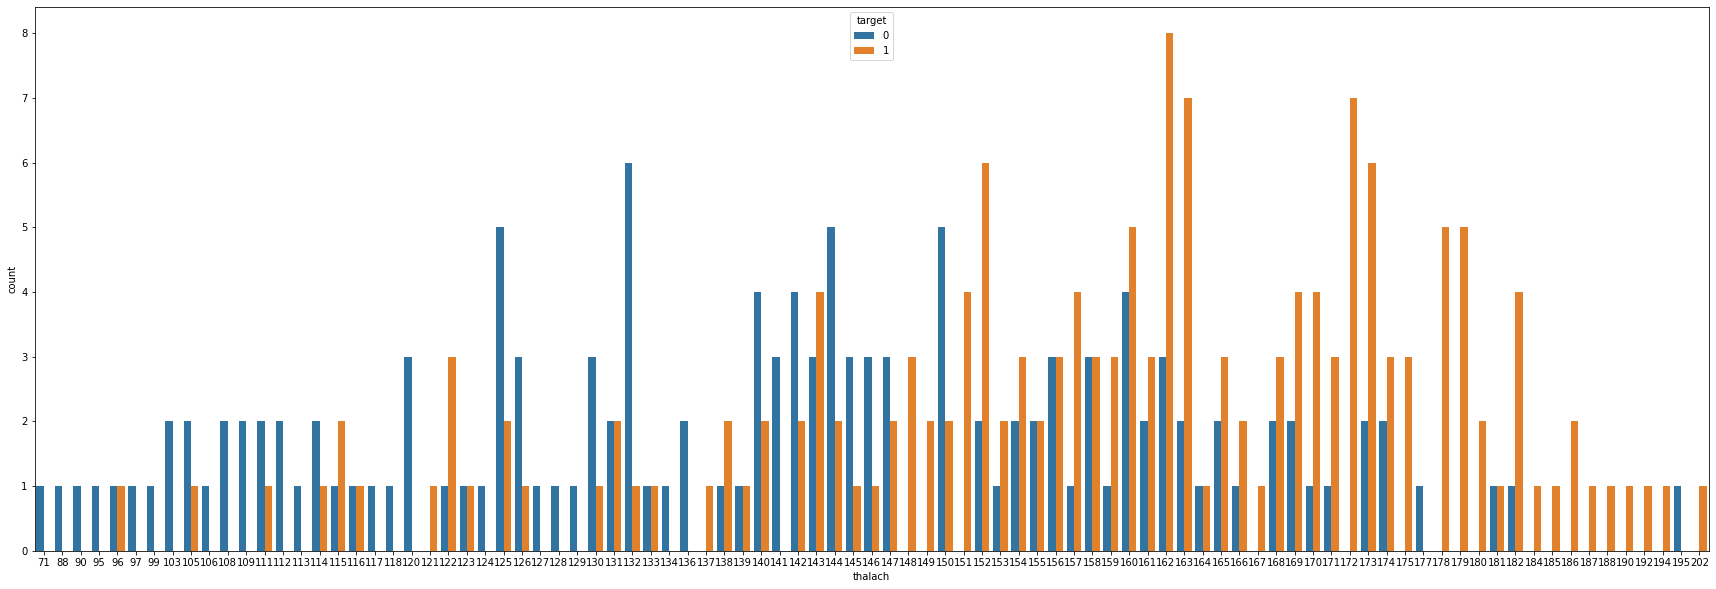

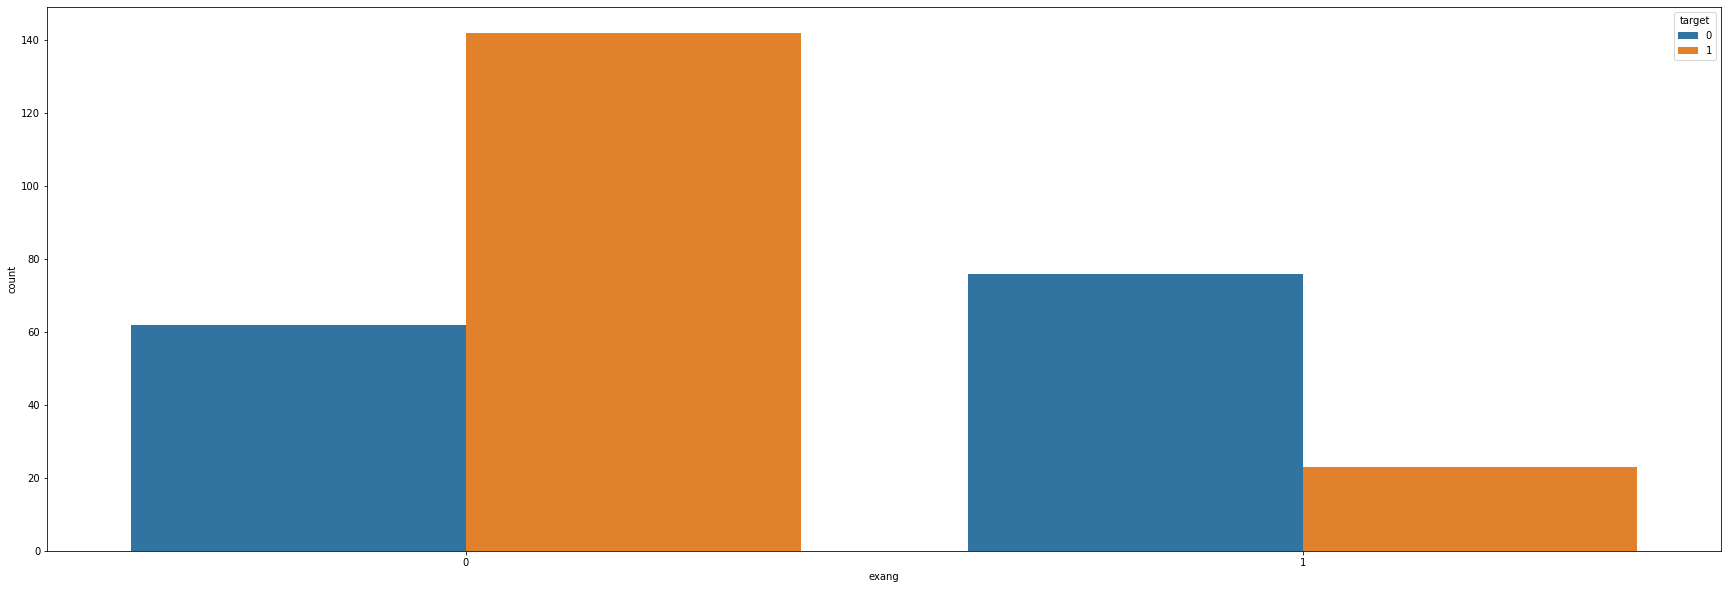

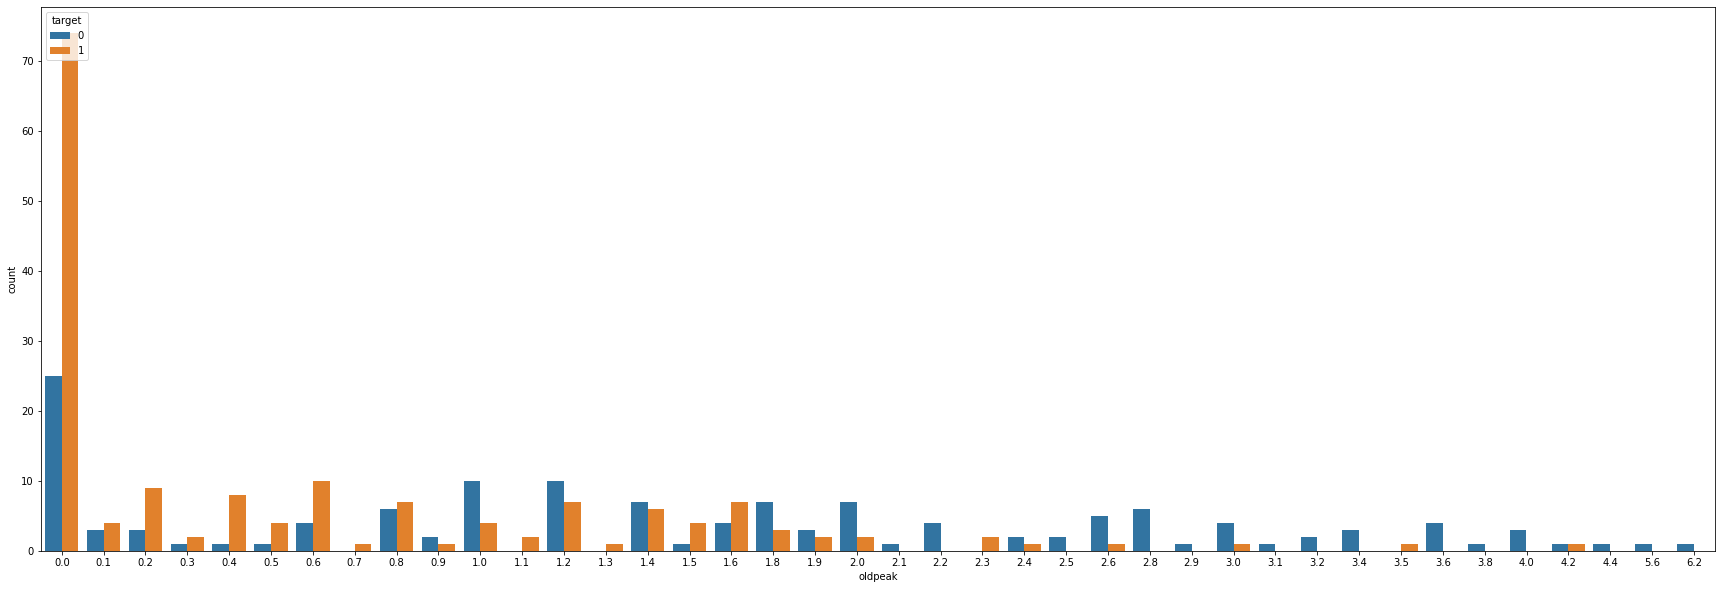

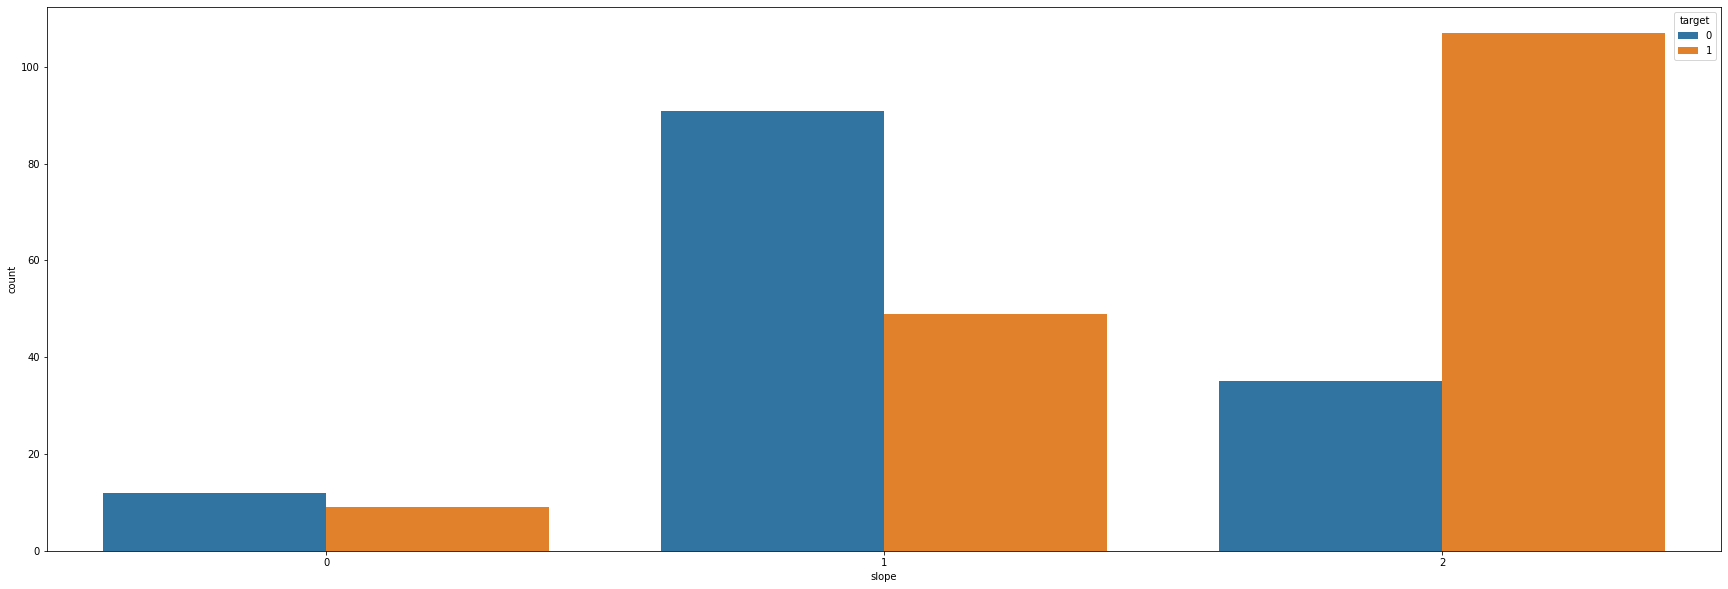

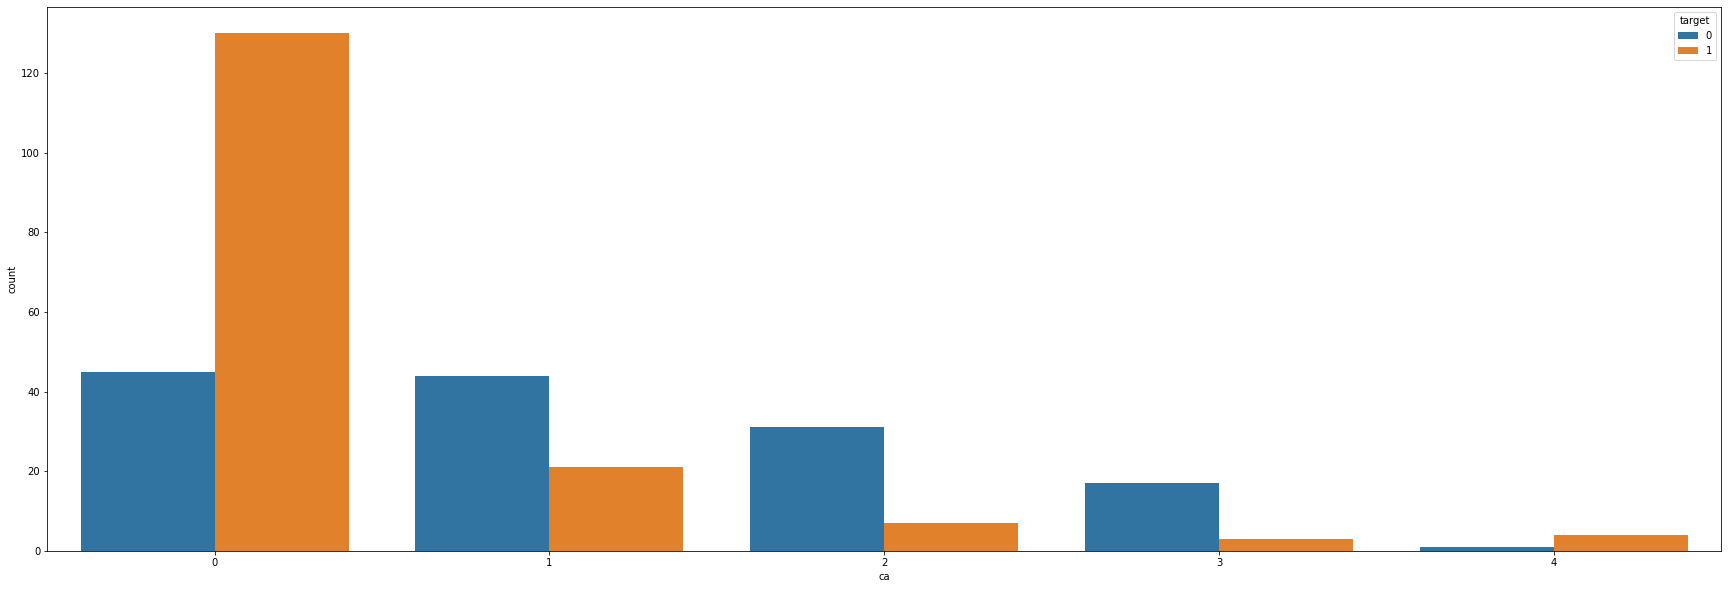

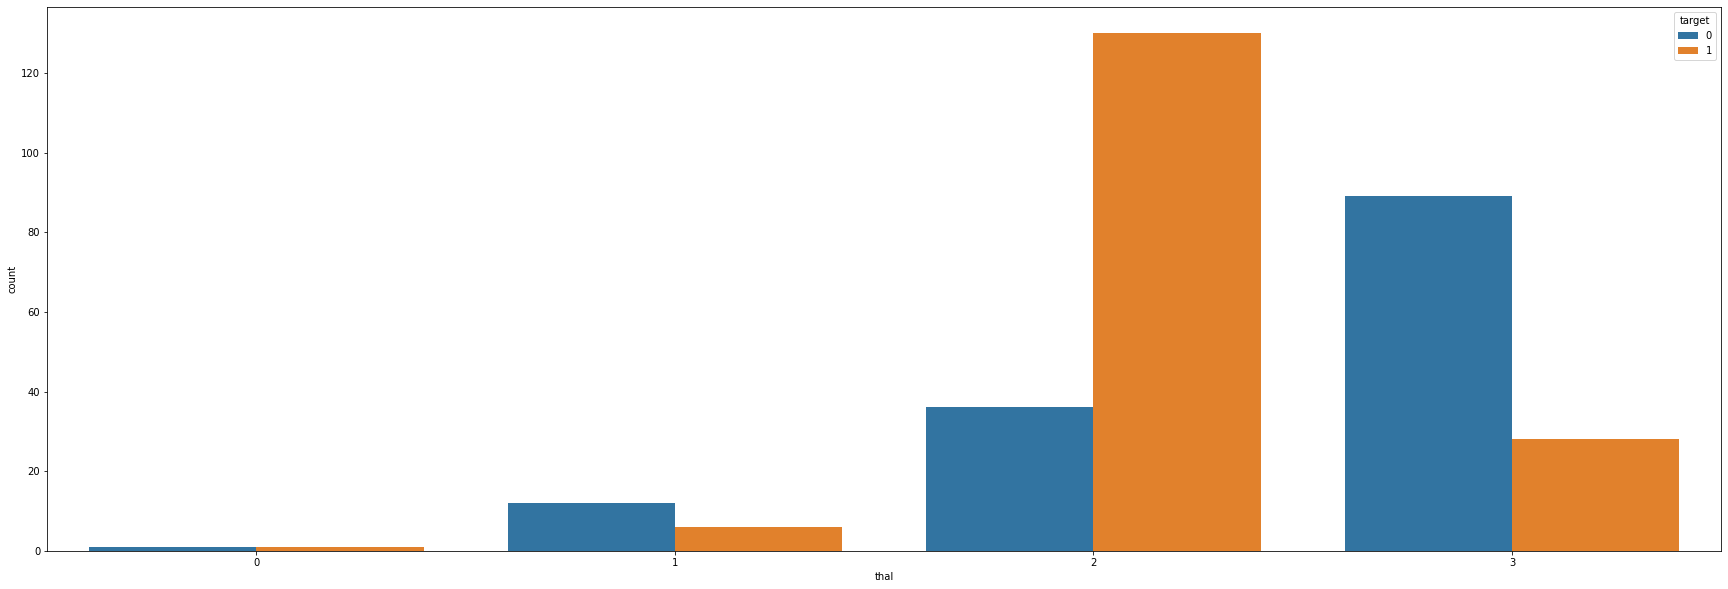

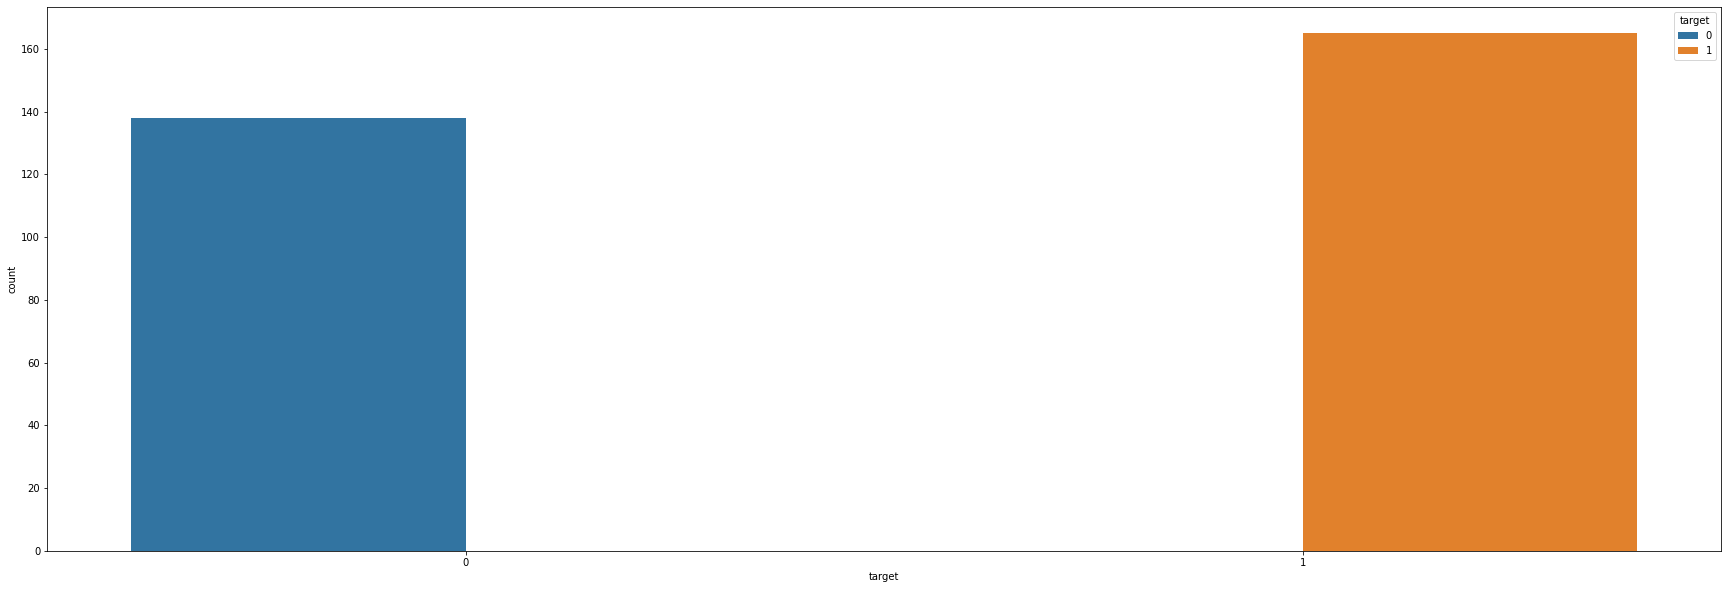

In [98]:
for i in df.columns:
  plt.figure(figsize = (30, 10))
  sns.countplot(df[i], hue = df["target"])
  plt.show();
  

# Modeling 

In [99]:
# x and y data
x = df.drop("target", axis = 1)
y = df["target"]

In [100]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [101]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [102]:
# splitting the data into train and test split 
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [103]:
# models 
models = {"KNN" : KNeighborsClassifier(),
          "LGR" : LogisticRegression(), 
          "RFC" : RandomForestClassifier()}

In [104]:
# models fitting with the training data
model_scores = {} 
for names, model in models.items():
  model.fit(x_train, y_train)
  # model Evaluation
  model_scores[names] = model.score(x_train, y_train)
   

In [105]:
model_scores 

{'KNN': 0.7603305785123967, 'LGR': 0.8553719008264463, 'RFC': 1.0}

In [106]:
# Model testing with testing data 
model_test_scores = {}
for names , model in models.items():
  model.fit(x_train, y_train)
  # Model evaluation on test data 
  model_test_scores[names] = model.score(x_test, y_test)

In [107]:
model_test_scores

{'KNN': 0.6885245901639344,
 'LGR': 0.8852459016393442,
 'RFC': 0.8524590163934426}

In [108]:
# Plotting classification Report for every model
model_test_scores = {}
for names , model in models.items():
  model.fit(x_train, y_train)
  # Model evaluation on test data 
  print(names, "=", classification_report(y_true = y_test,
                              y_pred = model.predict(x_test)))
  print("----------------------------------------------------")


KNN =               precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61

----------------------------------------------------
LGR =               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

----------------------------------------------------
RFC =               precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   m

In [109]:
# Performing Cross-validation on the the models
cross_val_for_models = {}
for names, model in models.items():
  cross_validation_score = (cross_val_score(model, x, y, cv = 5)).mean()
  cross_val_for_models [names] = cross_validation_score
  print(names,"=", cross_val_score(model, x, y, cv = 5))
  print("______________________________________________")

KNN = [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
______________________________________________
LGR = [0.81967213 0.86885246 0.85245902 0.85       0.75      ]
______________________________________________
RFC = [0.85245902 0.86885246 0.78688525 0.78333333 0.75      ]
______________________________________________


In [110]:
cross_val_for_models 

{'KNN': 0.643879781420765,
 'LGR': 0.8281967213114754,
 'RFC': 0.8018032786885246}

In [111]:
# Hyper parameter tuning for KNN to check whether if the model performs better than the other models 
for i in range(1,22):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train, y_train)
  print("n_neighbors =", i)
  print("training_score = ", knn.score(x_train, y_train))
  print("testing_score = " , knn.score(x_test, y_test))
  print("_____________________________________________")


n_neighbors = 1
training_score =  1.0
testing_score =  0.6229508196721312
_____________________________________________
n_neighbors = 2
training_score =  0.8099173553719008
testing_score =  0.639344262295082
_____________________________________________
n_neighbors = 3
training_score =  0.7727272727272727
testing_score =  0.6557377049180327
_____________________________________________
n_neighbors = 4
training_score =  0.743801652892562
testing_score =  0.6721311475409836
_____________________________________________
n_neighbors = 5
training_score =  0.7603305785123967
testing_score =  0.6885245901639344
_____________________________________________
n_neighbors = 6
training_score =  0.7520661157024794
testing_score =  0.7213114754098361
_____________________________________________
n_neighbors = 7
training_score =  0.743801652892562
testing_score =  0.7049180327868853
_____________________________________________
n_neighbors = 8
training_score =  0.7231404958677686
testing_score =  0.6

The K-NearestNeighbors model is not so working properly on this data so we will consider the other 2 models 

In [112]:
# Hyper parameter tuning of the the Logistic Regression Model

In [113]:
log_re_grid={"C": np.logspace(-4,4,20),
             "solver": ["liblinear"]}

In [114]:
np.random.seed(42)

rscv_log_re= RandomizedSearchCV( LogisticRegression(),
                                 param_distributions= log_re_grid,
                                 cv=5,
                                 n_iter =20,
                                 verbose=True)
# fitting the training sets 
rscv_log_re.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [115]:
rscv_log_re.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [116]:
rscv_log_re.score(x_test, y_test)

0.8852459016393442

In [117]:
# Hyper parameter tuning of the RandomForestClassifier
rfc_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth":[None, 3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [118]:
rscv_rfc = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions= rfc_grid,
                              cv = 5, 
                              n_iter = 20,
                              verbose = True)

# fitting the training sets
rscv_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [119]:
rscv_rfc.best_params_

{'n_estimators': 360,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [120]:
rscv_rfc.score(x_test, y_test)

0.8688524590163934

In [121]:
# we have our logistic Regression model doing better with 88% so we will use that
lr = LogisticRegression(solver = "liblinear", 
                        C = 0.23357214690901212)
lr.fit(x_train, y_train)

# testing on training dataset 
print('training set score =',lr.score(x_train, y_train))

#testing on testing dataset 
print('testing set score =', lr.score(x_test, y_test))

training set score = 0.859504132231405
testing set score = 0.8852459016393442


In [122]:
# classification Report on the hypertuned model 
y_preds = lr.predict(x_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [123]:
# Confusion matrix 
cm = confusion_matrix(y_test, y_preds)
cm

array([[25,  4],
       [ 3, 29]])

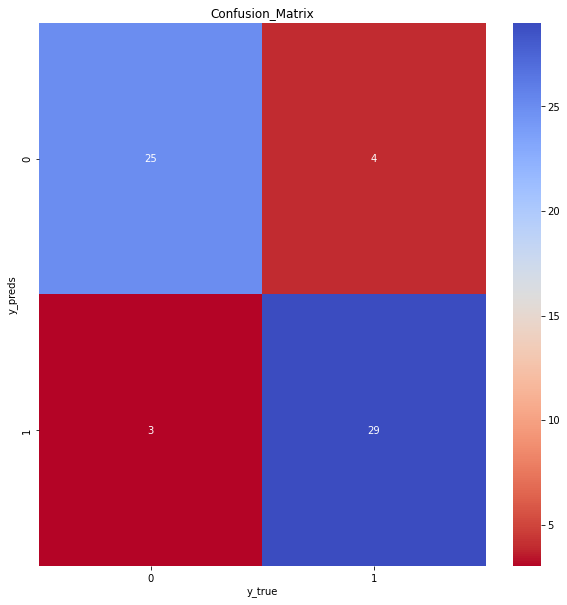

In [124]:
# lets visualize the matrix 
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True, cmap = "coolwarm_r")
plt.xlabel("y_true")
plt.ylabel("y_preds")
plt.title("Confusion_Matrix")
plt.show();

#  Feature Importance
Which features are important according to the model  

In [138]:
lr.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

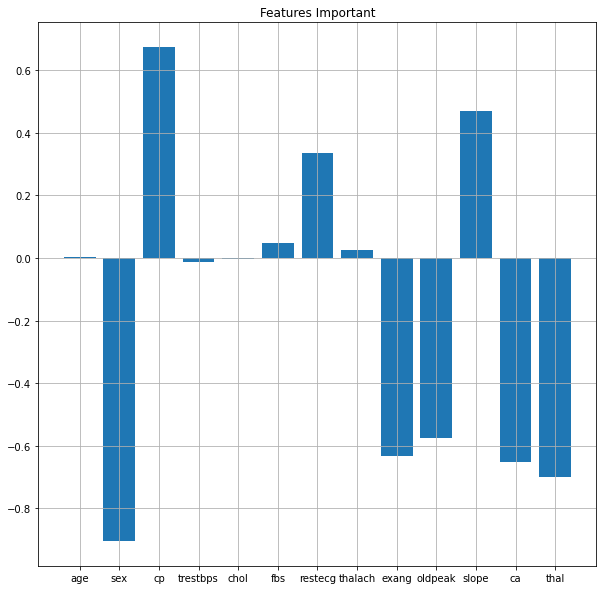

In [144]:
columns = x.columns
# lets visualize it 
plt.figure(figsize = (10,10))
plt.bar(columns, lr.coef_[0])
plt.title("Features Important")
plt.grid()
plt.show();

By looking at above grid, `age`,`trestbps`,`chol`,`fbs`,`thalach` ie. Age, Resting Blood Pressure, Cholestrol, Fasting Blood Sugar and Maximum Heart Rate Achieved are least Important according to the model.